___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
imagedf = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
imagedf.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] =True
plt.rcParams['patch.edgecolor'] ='white'

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

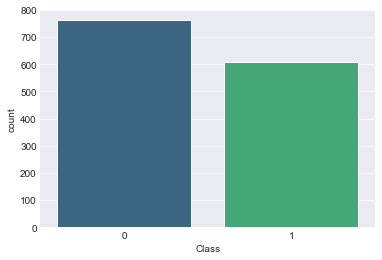

In [30]:
sns.set_style(style='darkgrid')
sns.countplot(x='Class', data=imagedf, palette = 'viridis')

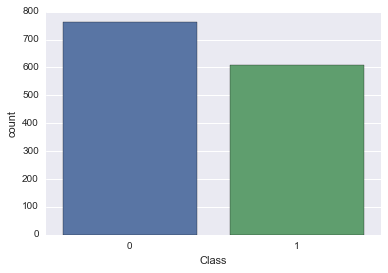

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

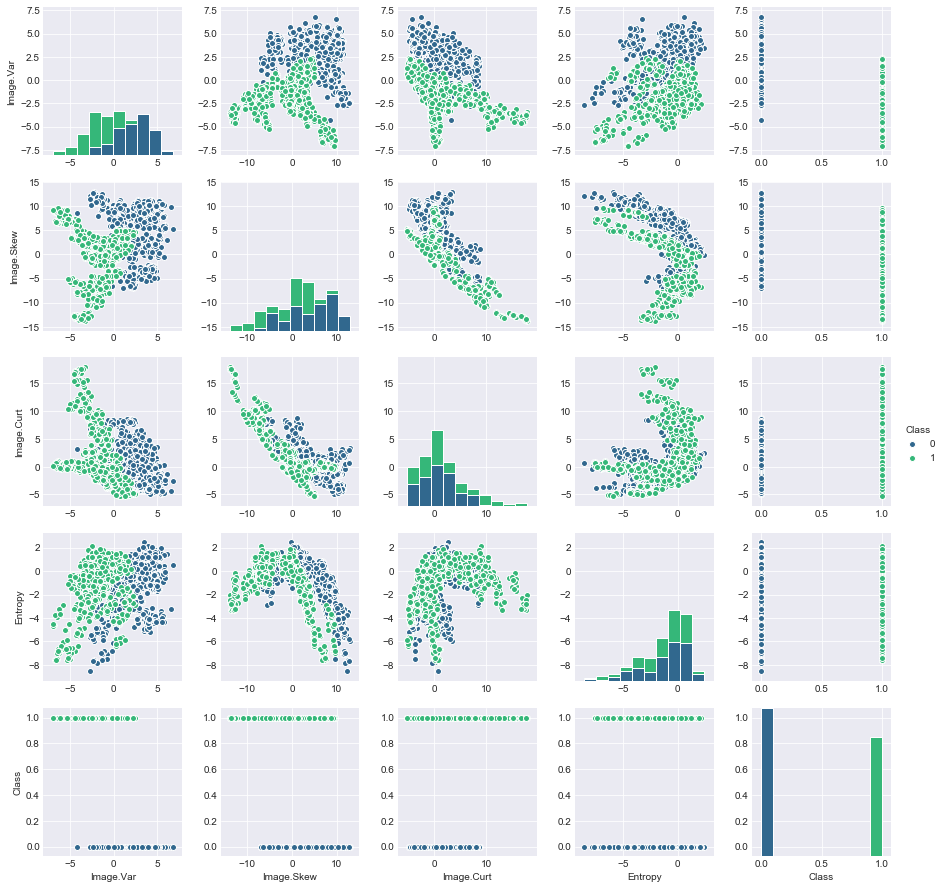

In [31]:
sns.pairplot(data=imagedf, hue='Class',palette='viridis')

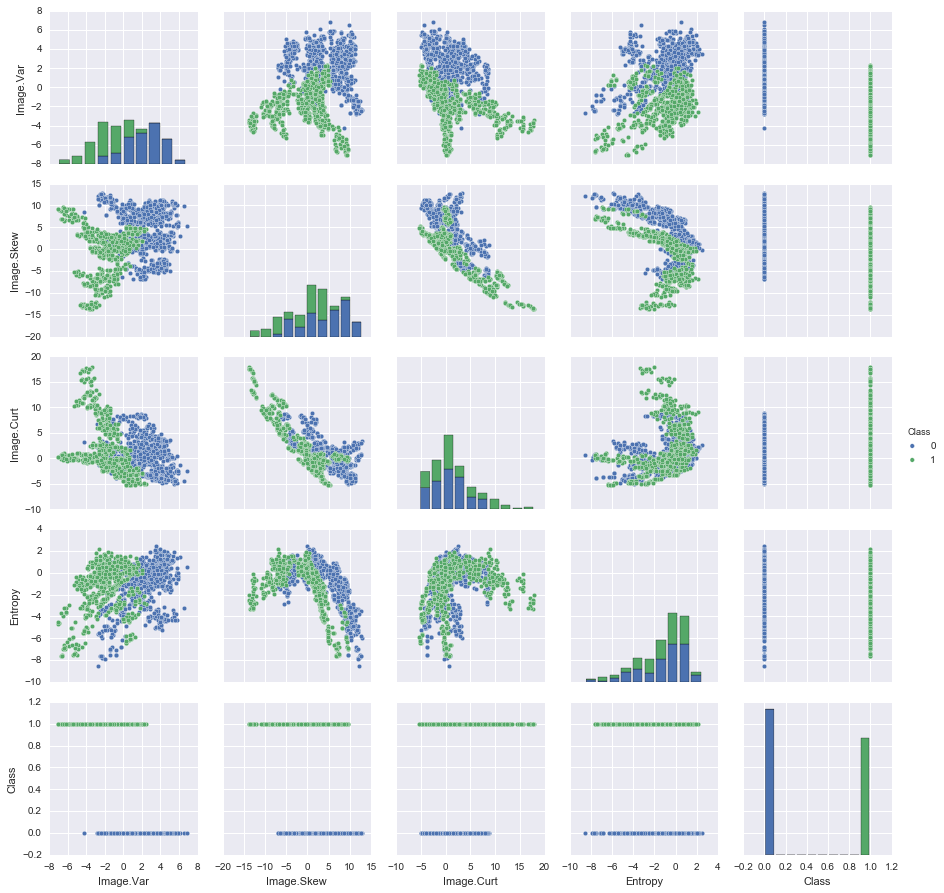

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [32]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [33]:
sc = StandardScaler()

**Fit scaler to the features.**

In [36]:
sc.fit(imagedf.drop(axis=1,columns='Class'))

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [39]:
ScledData = sc.transform(imagedf.drop(axis=1,columns='Class'))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [43]:
sdf = pd.DataFrame(ScledData,columns=imagedf.columns[:-1])

In [44]:
sdf.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [47]:
from sklearn.model_selection import train_test_split
X = sdf.as_matrix()
y = imagedf['Class'].as_matrix()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [52]:
import tensorflow.contrib.learn as skflow
feature_columns = skflow.infer_real_valued_columns_from_input(X_train)

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [53]:
classifier = skflow.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'D:\\Users\\viswanathan_k\\AppData\\Local\\Temp\\tmp2l6fye48', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_is_chief': True, '_master': '', '_tf_random_seed': None, '_evaluation_master': '', '_task_id': 0, '_num_worker_replicas': 0, '_keep_checkpoint_max': 5, '_environment': 'local', '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B4E9044978>, '_task_type': None, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0}


** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [54]:
classifier.fit(X_train, y_train,steps=200,batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Cre

DNNClassifier(params={'optimizer': None, 'hidden_units': [10, 20, 10], 'dropout': None, 'input_layer_min_slice_size': None, 'activation_fn': <function relu at 0x000002B4E6518A60>, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000002B4E9050470>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),)})

/Users/marci/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


DNNClassifier()

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [60]:
Predict_value = classifier.predict_classes(X_test, as_iterable=False)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from D:\Users\viswanathan_k\AppData\Local\Temp\tmp2l6fye48\model.ckpt-200


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test, Predict_value))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       221
          1       0.99      1.00      0.99       191

avg / total       1.00      1.00      1.00       412



In [64]:
print(confusion_matrix(y_test, Predict_value))

[[219   2]
 [  0 191]]


[[237   0]
 [  1 174]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfm = RandomForestClassifier(n_estimators =200)

In [68]:
rfm.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
pred = rfm.predict(X_test)

In [71]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       221
          1       0.98      1.00      0.99       191

avg / total       0.99      0.99      0.99       412



[[218   3]
 [  0 191]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       237
          1       0.98      0.99      0.99       175

avg / total       0.99      0.99      0.99       412



[[233   4]
 [  1 174]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!